# Using PCA as preprocessing to recognize dog breeds. #

Welcome to this assignment. In this asignment you will see if PCA helps in recognizing dog breeds.<br>
In the end of the Notebook the assignments are given.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/generated_dogs.csv'
'''
The dataset consists of 10000 dogs who died of old age. It is generated using meta data from dogs.

'''
df = pd.read_csv(url)
df.head()

,Breed,Gender,Age_time_of_death,Height,Weight,Likes,Skills
0,Border Collie,Male,13.3,20.70,40.50,likes_people_better_than_dogs,high_trainability
1,Basset Hound,Male,12.7,13.65,51.02,likes_dogs_better_than_people,no_special_skills
2,Dachshund,Female,14.0,8.59,24.58,likes_dogs_better_than_people,barks_like_hell
3,Boston Terrier,Male,12.3,16.27,20.13,likes_people_better_than_dogs,no_special_skills
4,Chihuahua,Male,15.3,7.14,5.92,likes_dogs_better_than_people,barks_like_hell


# First step #


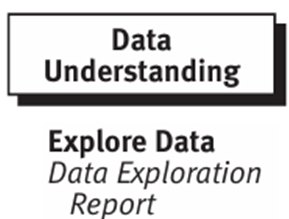


I will help you a little bit. We could try a pairplot.

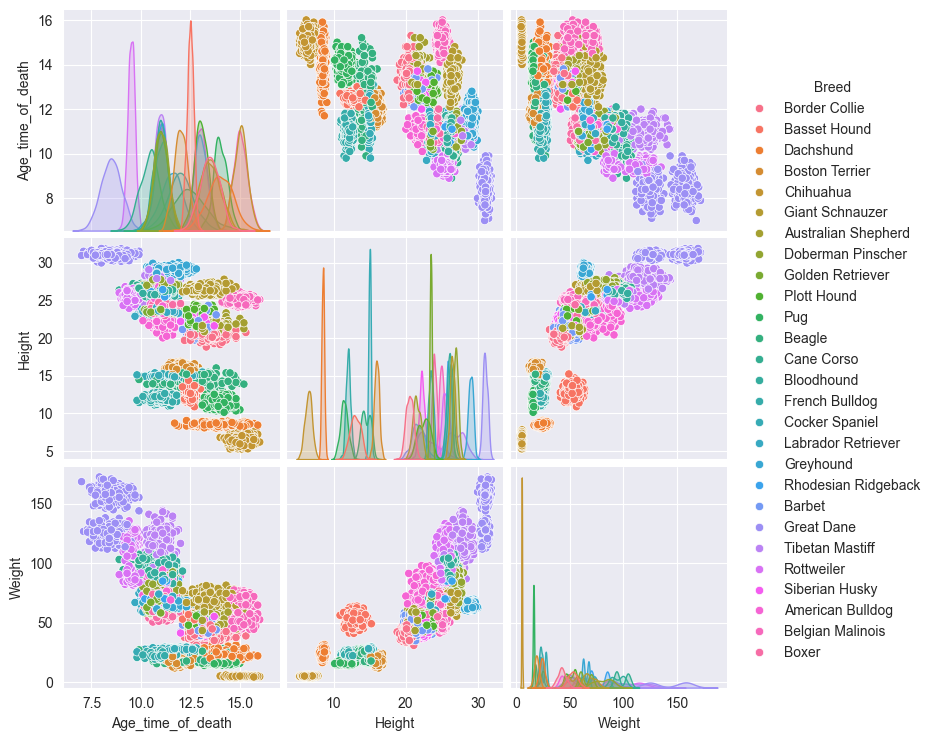

In [3]:
import seaborn as sns

sns.pairplot(df.drop(['Gender','Skills','Likes'],axis=1), hue='Breed')

0) Apply PCA and examine your PC-components. <br>
1) Apply PCA as preprocessing and a classification method of your choice.<br>
2) Compare it with the results you obtained without PCA.



In [4]:
df[["Age_time_of_death", "Weight"]]

,Age_time_of_death,Weight
0,13.3,40.50
1,12.7,51.02
2,14.0,24.58
3,12.3,20.13
4,15.3,5.92
...,...,...
9995,14.3,74.61
9996,14.4,58.92
9997,13.7,15.46
9998,11.0,58.22


In [5]:
# apliing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scale data
X = df[['Age_time_of_death','Height','Weight']]
y = df['Breed']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# print pca components
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)

Explained variance ratio: [0.79423357 0.15972004 0.04604638]
PCA components:
 [[-0.53275588  0.58053978  0.6157473 ]
 [ 0.81189065  0.55590087  0.17834743]
 [ 0.23875669 -0.59493512  0.76749427]]


The first two components contain most of the values.

In [6]:
# Classification with PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation using accuracy
print("accuracy:", clf.score(X_test, y_test))

accuracy: 0.8175


The accuracy increases with a 3rd component.

In [7]:
# Random Forest without PCA
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf_np = RandomForestClassifier(n_estimators=100, random_state=42)
clf_np.fit(X_train_np, y_train_np)
y_pred_np = clf_np.predict(X_test_np)

In [8]:
# Evaluation using accuracy
print("accuracy without PCA:", clf_np.score(X_test_np, y_test_np))

accuracy without PCA: 0.8335


The accuracy without PCA is slightly better. This may be because I used random forest. PCA may also be more usefull when there are more features.